<a href="https://colab.research.google.com/github/mmiqdam/mmiqdam/blob/main/Land_cover_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geospatial Analysis : Land Cover Change Analysis in Buleleng District (2017-2024)**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the desired storage location
loc = '/content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/Landcover-20250706T024130Z-1-001/Landcover'

# Change to the previously defined storage location
os.chdir(loc)

# Check if the storage location matches the one we defined
print('Working Directory: ',os.getcwd())

Mounted at /content/drive
Working Directory:  /content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/Landcover-20250706T024130Z-1-001/Landcover


Prepairing data

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

!pip install contextily
import contextily as cx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.4 MB/s eta 0:00:00


In [ ]:
# Call the administrative boundary data for Bali province
adm_bali = gpd.read_file('Bali_UTM.shp')
adm_bali.head()


,Provinsi,Kabupaten,geometry
0,Bali,Denpasar,"MULTIPOLYGON (((304354.621 9034911.405, 304336..."
1,Bali,Buleleng,"MULTIPOLYGON (((269768.547 9073350.901, 269606..."
2,Bali,Jembrana,"POLYGON ((236106.882 9070624.049, 236030.548 9..."
3,Bali,Karangasem,"POLYGON ((334653.691 9055172.671, 334516.32 90..."
4,Bali,Tabanan,"POLYGON ((284993.663 9052011.954, 284959.153 9..."


In [ ]:
# Check Unique values to find out which districts are in the adm_bali data
adm_bali['Kabupaten'].unique()


array(['Denpasar', 'Buleleng', 'Jembrana', 'Karangasem', 'Tabanan',
       'Klungkung', 'Bangli', 'Badung', 'Gianyar'], dtype=object)

<Axes: >

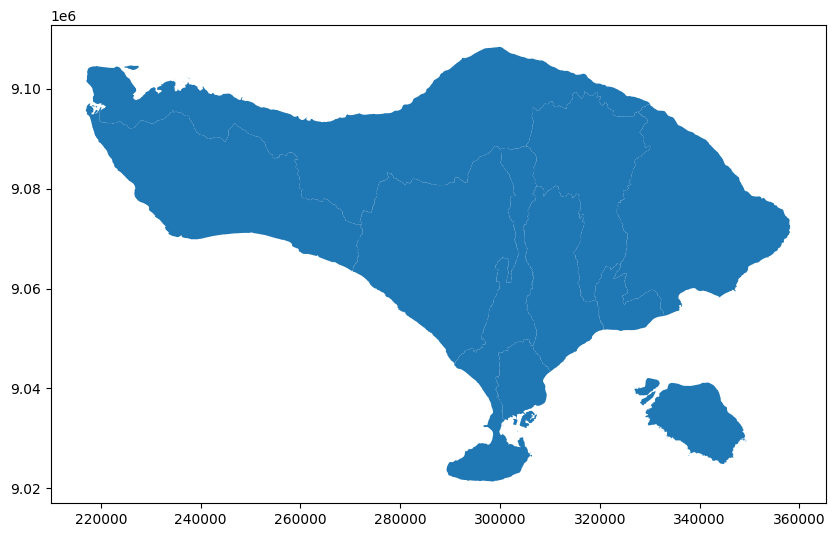

In [ ]:
# Try displaying the data as a plot
adm_bali.plot(figsize=(10,10))

In [ ]:
# Filter for Buleleng district (we will focus on one district only)
buleleng = adm_bali[adm_bali['Kabupaten']=='Buleleng']
buleleng


,Provinsi,Kabupaten,geometry
1,Bali,Buleleng,"MULTIPOLYGON (((269768.547 9073350.901, 269606..."


In [ ]:
# Load land cover data for 2017 and 2024
tl_2017 = gpd.read_file('PL_2017_Bali.shp')
tl_2024 = gpd.read_file('PL_2024_Bali.shp')

# Check the contents of the land cover data
display(tl_2017.head())
display(tl_2024.head())


,DN,TL_2017,geometry
0,7,Lahan Terbangun,"POLYGON ((299510 9108370, 299520 9108370, 2995..."
1,1,Tubuh Air,"POLYGON ((300220 9108370, 300230 9108370, 3002..."
2,1,Tubuh Air,"POLYGON ((300240 9108360, 300250 9108360, 3002..."
3,1,Tubuh Air,"POLYGON ((300260 9108350, 300280 9108350, 3002..."
4,1,Tubuh Air,"POLYGON ((300280 9108340, 300300 9108340, 3003..."


,DN,TL_2024,geometry
0,1,Tubuh Air,"POLYGON ((300340 9108320, 300350 9108320, 3003..."
1,1,Tubuh Air,"POLYGON ((300360 9108310, 300370 9108310, 3003..."
2,7,Lahan Terbangun,"POLYGON ((298690 9108290, 298750 9108290, 2987..."
3,1,Tubuh Air,"POLYGON ((297920 9108220, 298090 9108220, 2980..."
4,1,Tubuh Air,"POLYGON ((297810 9108210, 297870 9108210, 2978..."


In [ ]:
# Check unique values of the land cover column
tl_2017['TL_2017'].unique()

array(['Lahan Terbangun', 'Tubuh Air', 'Semak Belukar', 'Vegetasi',
       'Pertanian', 'Lahan Terbuka', 'Vegetasi Tergenang', 'Tutupan Awan',
       'Salju'], dtype=object)

In [ ]:
# Check the coordinate system
buleleng.crs

tl_2017.crs

tl_2024.crs

<Projected CRS: EPSG:32750>
Name: WGS 84 / UTM zone 50S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 114°E and 120°E, southern hemisphere between 80°S and equator, onshore and offshore. Australia. Indonesia.
- bounds: (114.0, -80.0, 120.0, 0.0)
Coordinate Operation:
- name: UTM zone 50S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

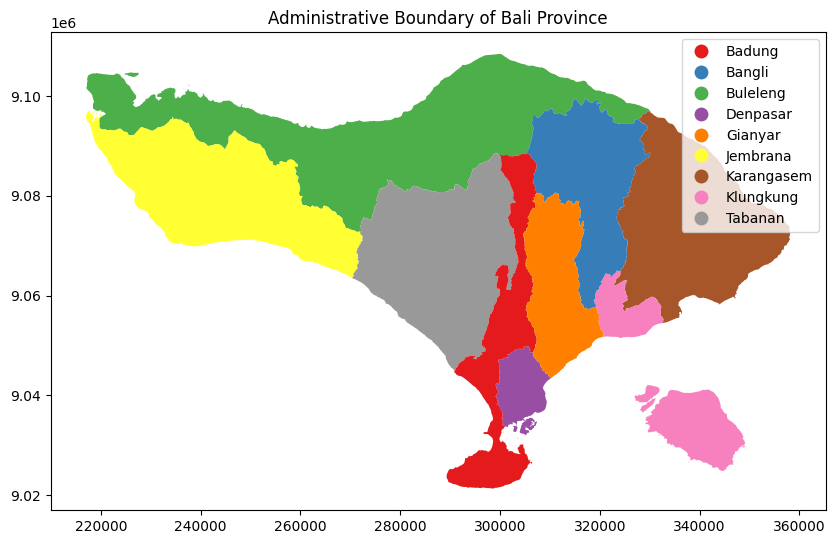

In [ ]:
# Plot adm_bali with different colors for each district
fig, ax = plt.subplots(figsize=(10,10))
adm_bali.plot(ax=ax, column='Kabupaten', cmap='Set1', legend=True)
plt.title('Administrative Boundary of Bali Province')
plt.show()


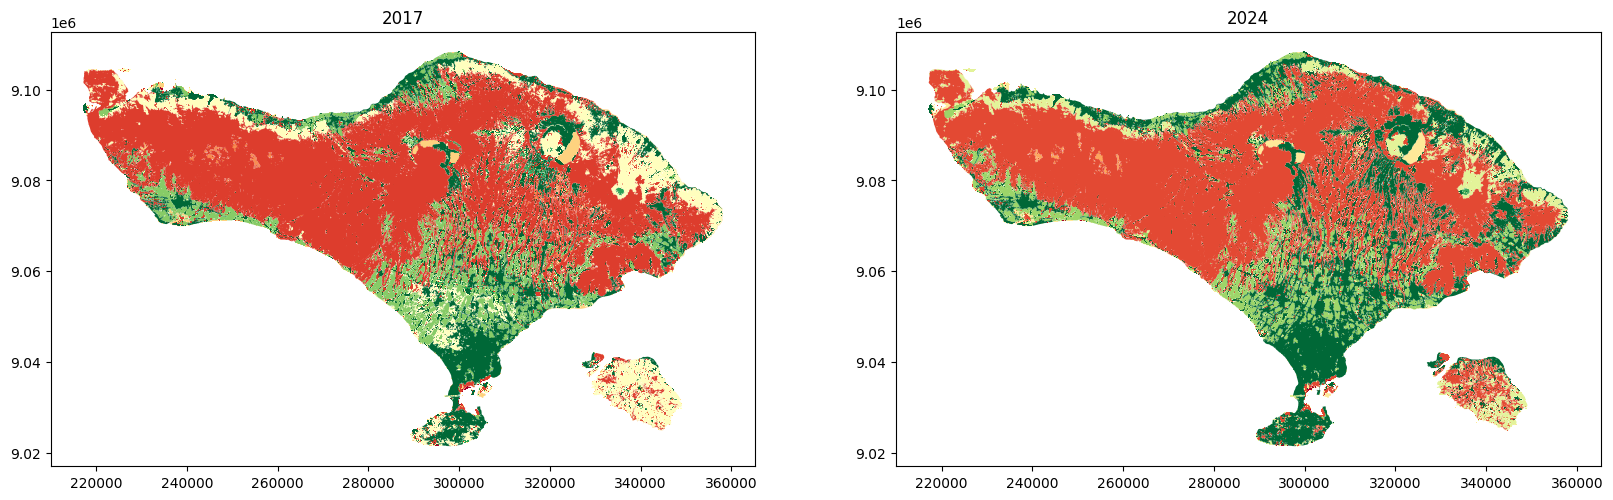

In [ ]:
# Plot land cover 2017 and 2024
fig, ax = plt.subplots(1,2,figsize=(20,10))

tl_2017.plot(ax=ax[0], column='TL_2017', cmap='RdYlGn_r')
tl_2024.plot(ax=ax[1], column='TL_2024', cmap='RdYlGn_r')

ax[0].set_title('2017')
ax[1].set_title('2024')

plt.show()

Procesing data

In [ ]:
# Clip land cover data for 2017 and 2024 according to the administrative boundary of Buleleng District
tl_buleleng_2017 = gpd.clip(tl_2017, buleleng)
tl_buleleng_2024 = gpd.clip(tl_2024, buleleng)


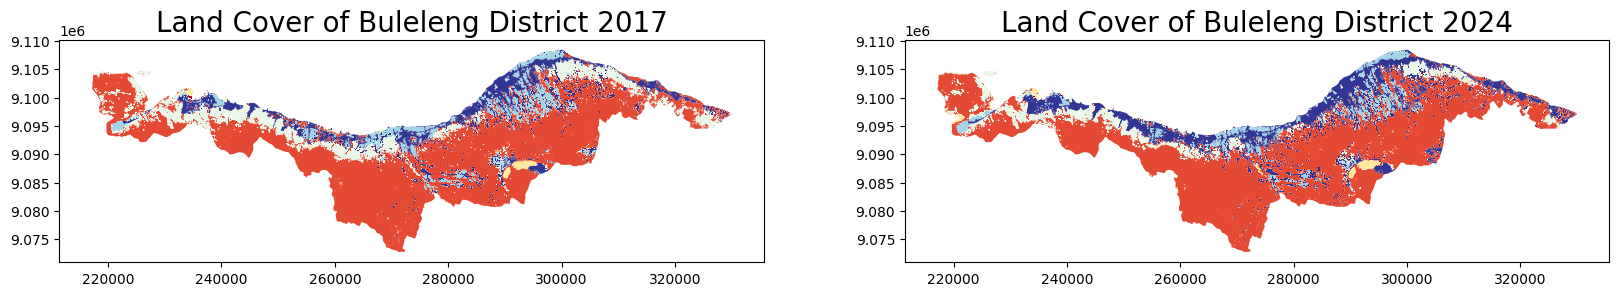

In [ ]:
# Visualize the clipping results
fig, ax = plt.subplots(1,2,figsize=(20,10))

tl_buleleng_2017.plot(ax=ax[0], column='TL_2017', cmap='RdYlBu_r')
tl_buleleng_2024.plot(ax=ax[1], column='TL_2024', cmap='RdYlBu_r')

ax[0].set_title('Land Cover of Buleleng District 2017', fontsize=20)
ax[1].set_title('Land Cover of Buleleng District 2024', fontsize=20)

plt.show()

In [ ]:
# Check unique values of land cover
tl_buleleng_2017['TL_2017'].unique()

tl_buleleng_2024['TL_2024'].unique()

array(['Tutupan Awan', 'Lahan Terbangun', 'Semak Belukar', 'Vegetasi',
       'Pertanian', 'Tubuh Air', 'Lahan Terbuka', 'Vegetasi Tergenang'],
      dtype=object)

Visualisasi data

In [ ]:
# Mapping land cover classes to colors (using class names as keys)
class_color_mapping = {
    'Vegetasi': '#05450a',   # Vegetation
    'Vegetasi Tergenang': '#009900',  # Flooded Vegetation
    'Tutupan Awan': '#dade48',  # Cloud Cover
    'Semak Belukar': '#b6ff05',  # Shrubland
    'Lahan Terbangun': '#a5a5a5',  # Built-up Area
    'Pertanian': '#ff6d4c',  # Agriculture
    'Lahan Terbuka': '#f9ffa4',  # Open Land
    'Tubuh Air': '#1c0dff'  # Water Body
}

In [ ]:
# Land cover class names for the legend
labels = list(class_color_mapping.keys())

In [ ]:
# Function to map colors based on class name
def map_colors(value):
    return class_color_mapping.get(value, '#ffffff')  # Default to white if class is not found

In [ ]:
# Add a color column to the geospatial data based on class name
tl_buleleng_2017['color'] = tl_buleleng_2017['TL_2017'].map(map_colors)
tl_buleleng_2024['color'] = tl_buleleng_2024['TL_2024'].map(map_colors)

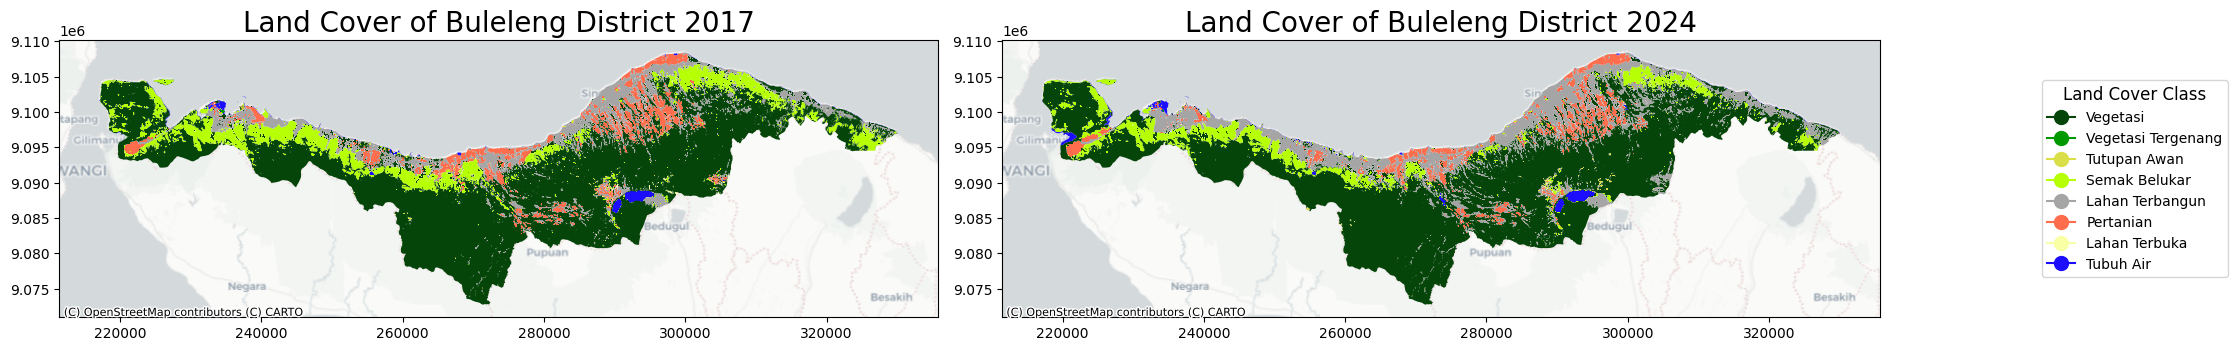

In [ ]:
# Plot the map with controlled colors
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the 2017 and 2024 data with manual colors from the color column
tl_buleleng_2017.plot(ax=ax[0], color=tl_buleleng_2017['color'], legend=False)
tl_buleleng_2024.plot(ax=ax[1], color=tl_buleleng_2024['color'], legend=False)

# Set map titles
ax[0].set_title('Land Cover of Buleleng District 2017', fontsize=20)
ax[1].set_title('Land Cover of Buleleng District 2024', fontsize=20)

# Add basemap from CartoDB Positron
cx.add_basemap(ax[0], crs=tl_buleleng_2017.crs.to_string(), source=cx.providers.CartoDB.Positron)
cx.add_basemap(ax[1], crs=tl_buleleng_2024.crs.to_string(), source=cx.providers.CartoDB.Positron)

# Add manual legend
handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
           for label, color in class_color_mapping.items()]

# Add legend outside the plot (e.g., to the right)
fig.legend(handles=handles, loc='center right', title="Land Cover Class", fontsize=10, title_fontsize=12, bbox_to_anchor=(1.12, 0.5))

# Display plot without overlapping
plt.tight_layout(rect=[0, 0, 0.95, 1])  # adjust the layout to make space for the legend
plt.show()

Intersect landcover

In [ ]:
tl_buleleng_intersect = gpd.overlay(tl_buleleng_2017, tl_buleleng_2024, how='intersection', keep_geom_type=True)
tl_buleleng_intersect.head()


,DN_1,TL_2017,color_1,DN_2,TL_2024,color_2,geometry
0,7,Lahan Terbangun,#a5a5a5,7,Lahan Terbangun,#a5a5a5,"MULTIPOLYGON (((328430 9096210, 328440 9096210..."
1,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328682.431 9096320, 328671.652..."
2,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328440 9096180, 328430 9096180..."
3,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328290 9096350, 328290 9096360..."
4,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((329170 9096580, 329170 9096560..."


Perhitungan luas

In [ ]:
# Calculate area in hectares
tl_buleleng_intersect['Luas_Ha'] = tl_buleleng_intersect.area / 10000
tl_buleleng_intersect.head()

,DN_1,TL_2017,color_1,DN_2,TL_2024,color_2,geometry,Luas_Ha
0,7,Lahan Terbangun,#a5a5a5,7,Lahan Terbangun,#a5a5a5,"MULTIPOLYGON (((328430 9096210, 328440 9096210...",41.799469
1,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328682.431 9096320, 328671.652...",0.077823
2,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328440 9096180, 328430 9096180...",0.102951
3,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328290 9096350, 328290 9096360...",0.640000
4,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((329170 9096580, 329170 9096560...",0.170000


AGREGASI

In [ ]:
# Aggregate to calculate land cover area per land cover class
tl_buleleng_2017_total = tl_buleleng_intersect.groupby('TL_2017').agg({'Luas_Ha': 'sum'}).reset_index()
tl_buleleng_2024_total = tl_buleleng_intersect.groupby('TL_2024').agg({'Luas_Ha': 'sum'}).reset_index()

In [ ]:
# Calculate area percentage
tl_buleleng_2017_total['Luas_%'] = tl_buleleng_2017_total['Luas_Ha'] / tl_buleleng_2017_total['Luas_Ha'].sum() *100
tl_buleleng_2024_total['Luas_%'] = tl_buleleng_2024_total['Luas_Ha'] / tl_buleleng_2024_total['Luas_Ha'].sum() *100


In [ ]:
display(
    tl_buleleng_2017_total,
    tl_buleleng_2024_total
)

,TL_2017,Luas_Ha,Luas_%
0,Lahan Terbangun,17006.467681,12.907765
1,Lahan Terbuka,113.087813,0.085833
2,Pertanian,9656.243365,7.329007
3,Semak Belukar,18043.820193,13.695107
4,Tubuh Air,1188.974185,0.902421
5,Tutupan Awan,138.519985,0.105135
6,Vegetasi,85569.457475,64.946495
7,Vegetasi Tergenang,37.202660,0.028237


,TL_2024,Luas_Ha,Luas_%
0,Lahan Terbangun,23819.371167,18.078701
1,Lahan Terbuka,9.982599,0.007577
2,Pertanian,8019.437029,6.086685
3,Semak Belukar,11879.475878,9.016422
4,Tubuh Air,1448.668427,1.099527
5,Tutupan Awan,262.205947,0.199012
6,Vegetasi,86302.883030,65.503159
7,Vegetasi Tergenang,11.749280,0.008918


Merge

In [ ]:
# Merge 2017 and 2024 data using the merge function
tl_buleleng_change = pd.merge(tl_buleleng_2017_total, tl_buleleng_2024_total, left_on='TL_2017', right_on='TL_2024', how='left')


In [ ]:
# Rename columns for easier understanding
tl_buleleng_change = tl_buleleng_change.rename(columns={'Luas_Ha_x': 'Luas_2017', 'Luas_Ha_y': 'Luas_2024'})

# Display area changes for the same classes
print("Area Change for the Same Class (2017 - 2024):")
display(tl_buleleng_change)




Area Change for the Same Class (2017 - 2024):


,TL_2017,Luas_2017,Luas_%_x,TL_2024,Luas_2024,Luas_%_y
0,Lahan Terbangun,17006.467681,12.907765,Lahan Terbangun,23819.371167,18.078701
1,Lahan Terbuka,113.087813,0.085833,Lahan Terbuka,9.982599,0.007577
2,Pertanian,9656.243365,7.329007,Pertanian,8019.437029,6.086685
3,Semak Belukar,18043.820193,13.695107,Semak Belukar,11879.475878,9.016422
4,Tubuh Air,1188.974185,0.902421,Tubuh Air,1448.668427,1.099527
5,Tutupan Awan,138.519985,0.105135,Tutupan Awan,262.205947,0.199012
6,Vegetasi,85569.457475,64.946495,Vegetasi,86302.883030,65.503159
7,Vegetasi Tergenang,37.202660,0.028237,Vegetasi Tergenang,11.749280,0.008918


In [ ]:

# Take one column for class description
tl_buleleng_change.drop(columns=['TL_2017'], inplace=True)
tl_buleleng_change.rename(columns={'TL_2024': 'Kelas'}, inplace=True)
tl_buleleng_change

,Luas_2017,Luas_%_x,Kelas,Luas_2024,Luas_%_y
0,17006.467681,12.907765,Lahan Terbangun,23819.371167,18.078701
1,113.087813,0.085833,Lahan Terbuka,9.982599,0.007577
2,9656.243365,7.329007,Pertanian,8019.437029,6.086685
3,18043.820193,13.695107,Semak Belukar,11879.475878,9.016422
4,1188.974185,0.902421,Tubuh Air,1448.668427,1.099527
5,138.519985,0.105135,Tutupan Awan,262.205947,0.199012
6,85569.457475,64.946495,Vegetasi,86302.883030,65.503159
7,37.202660,0.028237,Vegetasi Tergenang,11.749280,0.008918


PERHITUNGAN PERUBAHAN LUAS TUTUPAN LAHAN

In [ ]:
# Calculate land cover area change
tl_buleleng_change['Perubahan_Luas'] = tl_buleleng_change['Luas_2024'] - tl_buleleng_change['Luas_2017']
tl_buleleng_change

,Luas_2017,Luas_%_x,Kelas,Luas_2024,Luas_%_y,Perubahan_Luas
0,17006.467681,12.907765,Lahan Terbangun,23819.371167,18.078701,6812.903486
1,113.087813,0.085833,Lahan Terbuka,9.982599,0.007577,-103.105214
2,9656.243365,7.329007,Pertanian,8019.437029,6.086685,-1636.806336
3,18043.820193,13.695107,Semak Belukar,11879.475878,9.016422,-6164.344315
4,1188.974185,0.902421,Tubuh Air,1448.668427,1.099527,259.694242
5,138.519985,0.105135,Tutupan Awan,262.205947,0.199012,123.685963
6,85569.457475,64.946495,Vegetasi,86302.883030,65.503159,733.425555
7,37.202660,0.028237,Vegetasi Tergenang,11.749280,0.008918,-25.453380


MELIHAT SEBARAN TUTUPAN LAHAN VEGETASI/HUTAN DI 2017 DAN 2024

,DN_1,TL_2017,color_1,DN_2,TL_2024,color_2,geometry,Luas_Ha
1,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328682.431 9096320, 328671.652...",0.077823
2,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328440 9096180, 328430 9096180...",0.102951
3,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328290 9096350, 328290 9096360...",0.640000
4,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((329170 9096580, 329170 9096560...",0.170000
5,11,Semak Belukar,#b6ff05,2,Vegetasi,#05450a,"MULTIPOLYGON (((326540 9094540, 326550 9094540...",227.011325


<Axes: >

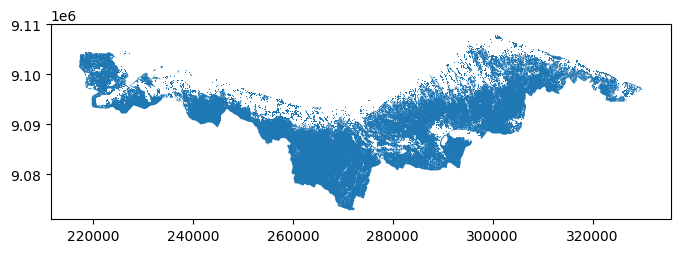

In [ ]:
vegetasi = tl_buleleng_intersect[(tl_buleleng_intersect['TL_2017']=='Vegetasi') | (tl_buleleng_intersect['TL_2024']=='Vegetasi')]

display(
    vegetasi.head(),
    vegetasi.plot(figsize=(8,8)) #Displaying vegetation/forest in both years
)

In [ ]:
# Create a function to describe vegetation change
def perubahan_vegetasi(row):
  if row['TL_2017']=='Vegetasi' and row['TL_2024']=='Vegetasi':
    return 'Vegetasi Tidak Berubah' # Vegetation Unchanged
  elif row['TL_2017']=='Vegetasi' and row['TL_2024']!='Vegetasi':
    return 'Vegetasi Berkurang' # Vegetation Decreased
  else:
    return 'Vegetasi Bertambah' # Vegetation Increased

In [ ]:
# Add an attribute indicating increased and decreased vegetation
vegetasi['Perubahan_Vegetasi'] = vegetasi.apply(perubahan_vegetasi, axis=1)
vegetasi

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,DN_1,TL_2017,color_1,DN_2,TL_2024,color_2,geometry,Luas_Ha,Perubahan_Vegetasi
1,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328682.431 9096320, 328671.652...",0.077823,Vegetasi Bertambah
2,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328440 9096180, 328430 9096180...",0.102951,Vegetasi Bertambah
3,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((328290 9096350, 328290 9096360...",0.640000,Vegetasi Bertambah
4,7,Lahan Terbangun,#a5a5a5,2,Vegetasi,#05450a,"MULTIPOLYGON (((329170 9096580, 329170 9096560...",0.170000,Vegetasi Bertambah
5,11,Semak Belukar,#b6ff05,2,Vegetasi,#05450a,"MULTIPOLYGON (((326540 9094540, 326550 9094540...",227.011325,Vegetasi Bertambah
...,...,...,...,...,...,...,...,...,...
30326,2,Vegetasi,#05450a,11,Semak Belukar,#b6ff05,"POLYGON ((227160 9104590, 227160 9104580, 2271...",0.430000,Vegetasi Berkurang
30327,2,Vegetasi,#05450a,1,Tubuh Air,#1c0dff,"POLYGON ((227090 9104590, 227070 9104590, 2270...",0.020000,Vegetasi Berkurang
30328,2,Vegetasi,#05450a,11,Semak Belukar,#b6ff05,"POLYGON ((227240 9104570, 227210 9104570, 2272...",0.030000,Vegetasi Berkurang
30341,2,Vegetasi,#05450a,11,Semak Belukar,#b6ff05,"POLYGON ((225890 9104650, 225890 9104640, 2259...",1.549079,Vegetasi Berkurang


In [ ]:
# Calculate the area of forest change
perubahan_luas_vegetasi = vegetasi.groupby('Perubahan_Vegetasi').agg({'Luas_Ha': 'sum'}).reset_index()
perubahan_luas_vegetasi

,Perubahan_Vegetasi,Luas_Ha
0,Vegetasi Berkurang,5732.119164
1,Vegetasi Bertambah,6465.544718
2,Vegetasi Tidak Berubah,79837.338312


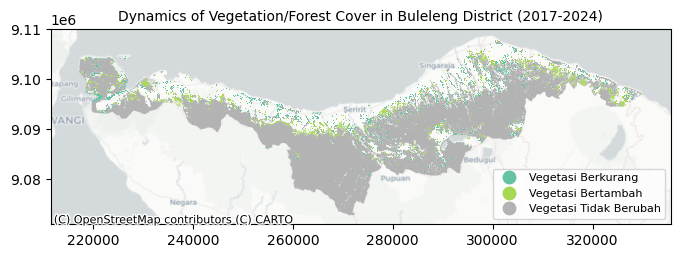

In [ ]:
# Display the map of forest area change dynamics (increased and decreased)
fig, ax = plt.subplots(figsize=(8, 8))

vegetasi.plot(
    ax=ax,
    column='Perubahan_Vegetasi',
    cmap='Set2',
    categorical=True,
    legend=True,
    legend_kwds={
        'loc': 'lower right',
        'fontsize': 8
    }
)

plt.title('Dynamics of Vegetation/Forest Cover in Buleleng District (2017-2024)', fontsize= 10)
cx.add_basemap(ax, crs=vegetasi.crs.to_string(), source=cx.providers.CartoDB.Positron)

plt.show()